In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics




In [5]:
# load the dataset
car_dataset = pd.read_csv('car data.csv')

# display the first 5 rows of the dataset
car_dataset.head()




Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [8]:
car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
car_dataset.shape

(301, 9)

In [10]:
#checking the number of missing values

car_dataset.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
#checking the distribution of categorical data

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())




Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [13]:
#encoding the categorical data

car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)




C:\Users\Casper\AppData\Local\Temp\ipykernel_15448\266272213.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\Casper\AppData\Local\Temp\ipykernel_15448\266272213.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\Casper\AppData\Local\Temp\ipykernel_15448\266272213.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

In [14]:
car_dataset.head()


Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0

In [15]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

print(X)
print(Y)




     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)


In [18]:
# Linar Regression
linear_model = LinearRegression()

#training the model
linear_model.fit(X_train,Y_train)




LinearRegression()

In [19]:
# Model Evaluation

#prediction on training data
training_data_prediction = linear_model.predict(X_train)




In [20]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)

print("R squared error : ",error_score)


R squared error :  0.8799451660493699


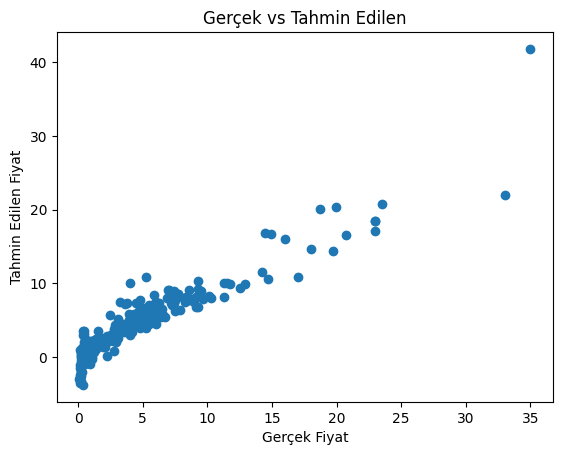

In [22]:
# gerçek fiyatları ve tahmin edilen fiyatları görselleştirme
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Edilen")
plt.show()


In [23]:
test_data_prediction = linear_model.predict(X_test)


In [24]:

error_score = metrics.r2_score(Y_test,test_data_prediction)

print("R squared error : ",error_score)



R squared error :  0.8365766715026473


In [25]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Edilen")
plt.show()




In [26]:
# Lasso Regresion 
lasso_model = Lasso()

In [27]:
lasso_model.fit(X_train, Y_train)

Lasso()

In [28]:
training_data_prediction = lasso_model.predict(X_train)


In [29]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)

print("R squared error : ",error_score)




R squared error :  0.8427856123435795


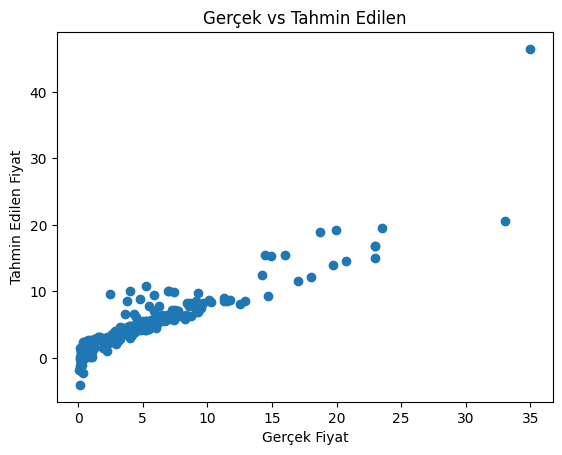

In [30]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Edilen")
plt.show()




In [31]:
test_data_prediction = lasso_model.predict(X_test)


error_score = metrics.r2_score(Y_test,test_data_prediction)

print("R squared error : ",error_score)


plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek vs Tahmin Edilen")
plt.show()




R squared error :  0.8709167941173201


In [32]:
import pickle
# Modeli kaydet
pickle.dump(linear_model, open('car_price_model.pkl', 'wb'))